In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/assuncaolfi/Projects/blog/posts/fantasy-football':
  os.chdir(r'/Users/assuncaolfi/Projects/blog/posts/fantasy-football')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/importlib/_bootstrap.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/importlib/_bootstrap_external.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/zipimport.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/codecs.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/encodings/aliases.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/encodings/__init__.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/encodings/utf_8.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/abc.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/io.py": 1609488000.0, "/Users/assuncaolfi/.rye/py/cpython@3.11.3/install/lib/python3.11/stat.py": 1609488000.0, "/Users/assuncao

/var/folders/6t/m1wx6mz92tn6v72r696k5fg00000gn/T/ipykernel_54077/686993623.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
#| label: market
#| code-fold: false
from pydantic import BaseModel, Field
from typing import Dict, List


class Player(BaseModel):
    round: int = Field(alias="rodada_id")
    id: int = Field(alias="atleta_id")
    games: int = Field(alias="jogos_num")
    position: int = Field(alias="posicao_id")
    average: float = Field(alias="media_num")
    value: float = Field(alias="preco_num")
    score: float = Field(alias="pontos_num")
    appreciation: float = Field(alias="variacao_num")


class Market(BaseModel):
    players: List[Player] = Field(alias="atletas")


class Formation(BaseModel):
    goalkeeper: int = Field(alias="gol")
    defender: int = Field(alias="zag")
    winger: int = Field(alias="lat")
    midfielder: int = Field(alias="mei")
    forward: int = Field(alias="ata")
    coach: int = Field(alias="tec")

In [3]:
#| label: formations
from pydantic import RootModel
from rich import print
import urllib.request


class MetaFormation(BaseModel):
    id: int = Field(alias="esquema_id")
    name: str = Field(alias="nome")
    formation: Formation = Field(alias="posicoes")


class MetaFormations(RootModel):
    root: List[MetaFormation]


url = (
    "https://raw.githubusercontent.com/assuncaolfi/"
    "tophat/main/2022/38/esquemas.json"
)
data = urllib.request.urlopen(url).read()
meta_formations = MetaFormations.model_validate_json(data).root
formations = [m.formation for m in meta_formations]
print(formations)

[
    Formation(goalkeeper=1, defender=3, winger=0, midfielder=4, forward=3, coach=1),
    Formation(goalkeeper=1, defender=3, winger=0, midfielder=5, forward=2, coach=1),
    Formation(goalkeeper=1, defender=2, winger=2, midfielder=3, forward=3, coach=1),
    Formation(goalkeeper=1, defender=2, winger=2, midfielder=4, forward=2, coach=1),
    Formation(goalkeeper=1, defender=2, winger=2, midfielder=5, forward=1, coach=1),
    Formation(goalkeeper=1, defender=3, winger=2, midfielder=3, forward=2, coach=1),
    Formation(goalkeeper=1, defender=3, winger=2, midfielder=4, forward=1, coach=1)
]

In [4]:
#| label: df-players
import polars as pl


def read_players(round: int):
    url = (
        "https://raw.githubusercontent.com/assuncaolfi/"
        f"tophat/main/2022/{round:02}/atletas/mercado.json"
    )
    data = urllib.request.urlopen(url).read()
    market = Market.model_validate_json(data)
    players = market.players
    if round == 1:
        for player in players:
            player.round = 0
    return players


players = []
for round in range(1, 39):
    round_players = read_players(round)
    players.extend(round_players)
print(players[0])

Player(round=0, id=42234, games=0, position=1, average=0.0, value=10.0, score=0.0, appreciation=0.0)

In [5]:
#| label: player-117819
def print_player(id: int):
    player = players.filter(pl.col("id") == id)
    print(player)


players = (
    pl.DataFrame(players)
    .with_columns(round=pl.col("round") + 1)
    .sort("round", "id")
)
print(players)
print_player(117819)

shape: (30_063, 8)
┌───────┬────────┬───────┬──────────┬─────────┬───────┬───────┬──────────────┐
│ round ┆ id     ┆ games ┆ position ┆ average ┆ value ┆ score ┆ appreciation │
│ ---   ┆ ---    ┆ ---   ┆ ---      ┆ ---     ┆ ---   ┆ ---   ┆ ---          │
│ i64   ┆ i64    ┆ i64   ┆ i64      ┆ f64     ┆ f64   ┆ f64   ┆ f64          │
╞═══════╪════════╪═══════╪══════════╪═════════╪═══════╪═══════╪══════════════╡
│ 1     ┆ 37424  ┆ 0     ┆ 6        ┆ 0.0     ┆ 3.0   ┆ 0.0   ┆ 0.0          │
│ 1     ┆ 37646  ┆ 0     ┆ 3        ┆ 0.0     ┆ 5.0   ┆ 0.0   ┆ 0.0          │
│ 1     ┆ 37656  ┆ 0     ┆ 1        ┆ 0.0     ┆ 9.0   ┆ 0.0   ┆ 0.0          │
│ 1     ┆ 37788  ┆ 0     ┆ 1        ┆ 0.0     ┆ 4.0   ┆ 0.0   ┆ 0.0          │
│ …     ┆ …      ┆ …     ┆ …        ┆ …       ┆ …     ┆ …     ┆ …            │
│ 38    ┆ 121397 ┆ 0     ┆ 2        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 38    ┆ 121398 ┆ 0     ┆ 4        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 38    ┆ 121399 ┆ 0     ┆ 4        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 38    ┆ 121400 ┆ 0     ┆ 5        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
└───────┴────────┴───────┴──────────┴─────────┴───────┴───────┴──────────────┘

shape: (32, 8)
┌───────┬────────┬───────┬──────────┬─────────┬───────┬───────┬──────────────┐
│ round ┆ id     ┆ games ┆ position ┆ average ┆ value ┆ score ┆ appreciation │
│ ---   ┆ ---    ┆ ---   ┆ ---      ┆ ---     ┆ ---   ┆ ---   ┆ ---          │
│ i64   ┆ i64    ┆ i64   ┆ i64      ┆ f64     ┆ f64   ┆ f64   ┆ f64          │
╞═══════╪════════╪═══════╪══════════╪═════════╪═══════╪═══════╪══════════════╡
│ 7     ┆ 117819 ┆ 0     ┆ 3        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 8     ┆ 117819 ┆ 0     ┆ 3        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 9     ┆ 117819 ┆ 0     ┆ 3        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 10    ┆ 117819 ┆ 0     ┆ 3        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ …     ┆ …      ┆ …     ┆ …        ┆ …       ┆ …     ┆ …     ┆ …            │
│ 35    ┆ 117819 ┆ 11    ┆ 3        ┆ 3.46    ┆ 2.35  ┆ 0.0   ┆ -0.17        │
│ 36    ┆ 117819 ┆ 12    ┆ 3        ┆ 3.27    ┆ 2.2   ┆ 0.0   ┆ -0.15        │
│ 37    ┆ 117819 ┆ 12    ┆ 3        ┆ 3.27    ┆ 2.2   ┆ 0.0   ┆ 0.0          │
│ 38    ┆ 117819 ┆ 12    ┆ 3        ┆ 3.27    ┆ 2.2   ┆ 0.0   ┆ 0.0          │
└───────┴────────┴───────┴──────────┴─────────┴───────┴───────┴──────────────┘

In [6]:
#| label: filter-games
players = players.filter(
    pl.col("games") != pl.col("games").shift(1).over("id").fill_null(-1)
)
print_player(117819)

shape: (13, 8)
┌───────┬────────┬───────┬──────────┬─────────┬───────┬───────┬──────────────┐
│ round ┆ id     ┆ games ┆ position ┆ average ┆ value ┆ score ┆ appreciation │
│ ---   ┆ ---    ┆ ---   ┆ ---      ┆ ---     ┆ ---   ┆ ---   ┆ ---          │
│ i64   ┆ i64    ┆ i64   ┆ i64      ┆ f64     ┆ f64   ┆ f64   ┆ f64          │
╞═══════╪════════╪═══════╪══════════╪═════════╪═══════╪═══════╪══════════════╡
│ 7     ┆ 117819 ┆ 0     ┆ 3        ┆ 0.0     ┆ 1.0   ┆ 0.0   ┆ 0.0          │
│ 17    ┆ 117819 ┆ 1     ┆ 3        ┆ 8.8     ┆ 2.45  ┆ 0.0   ┆ 1.45         │
│ 18    ┆ 117819 ┆ 2     ┆ 3        ┆ 4.85    ┆ 1.4   ┆ 0.0   ┆ -1.05        │
│ 19    ┆ 117819 ┆ 3     ┆ 3        ┆ 3.2     ┆ 1.23  ┆ 0.0   ┆ -0.17        │
│ …     ┆ …      ┆ …     ┆ …        ┆ …       ┆ …     ┆ …     ┆ …            │
│ 33    ┆ 117819 ┆ 9     ┆ 3        ┆ 3.56    ┆ 2.71  ┆ 0.0   ┆ 0.31         │
│ 34    ┆ 117819 ┆ 10    ┆ 3        ┆ 3.57    ┆ 2.52  ┆ 0.0   ┆ -0.19        │
│ 35    ┆ 117819 ┆ 11    ┆ 3        ┆ 3.46    ┆ 2.35  ┆ 0.0   ┆ -0.17        │
│ 36    ┆ 117819 ┆ 12    ┆ 3        ┆ 3.27    ┆ 2.2   ┆ 0.0   ┆ -0.15        │
└───────┴────────┴───────┴──────────┴─────────┴───────┴───────┴──────────────┘

In [7]:
#| label: recover-score
players = players.with_columns(
    average=pl.col("average").shift(-1).over("id").fill_null(pl.col("average"))
).with_columns(
    score=2 * pl.col("average")
    - pl.col("average").shift(1).over("id").fill_null(pl.col("average")),
)
print_player(117819)

shape: (13, 8)
┌───────┬────────┬───────┬──────────┬─────────┬───────┬───────┬──────────────┐
│ round ┆ id     ┆ games ┆ position ┆ average ┆ value ┆ score ┆ appreciation │
│ ---   ┆ ---    ┆ ---   ┆ ---      ┆ ---     ┆ ---   ┆ ---   ┆ ---          │
│ i64   ┆ i64    ┆ i64   ┆ i64      ┆ f64     ┆ f64   ┆ f64   ┆ f64          │
╞═══════╪════════╪═══════╪══════════╪═════════╪═══════╪═══════╪══════════════╡
│ 7     ┆ 117819 ┆ 0     ┆ 3        ┆ 8.8     ┆ 1.0   ┆ 8.8   ┆ 0.0          │
│ 17    ┆ 117819 ┆ 1     ┆ 3        ┆ 4.85    ┆ 2.45  ┆ 0.9   ┆ 1.45         │
│ 18    ┆ 117819 ┆ 2     ┆ 3        ┆ 3.2     ┆ 1.4   ┆ 1.55  ┆ -1.05        │
│ 19    ┆ 117819 ┆ 3     ┆ 3        ┆ 2.43    ┆ 1.23  ┆ 1.66  ┆ -0.17        │
│ …     ┆ …      ┆ …     ┆ …        ┆ …       ┆ …     ┆ …     ┆ …            │
│ 33    ┆ 117819 ┆ 9     ┆ 3        ┆ 3.57    ┆ 2.71  ┆ 3.58  ┆ 0.31         │
│ 34    ┆ 117819 ┆ 10    ┆ 3        ┆ 3.46    ┆ 2.52  ┆ 3.35  ┆ -0.19        │
│ 35    ┆ 117819 ┆ 11    ┆ 3        ┆ 3.27    ┆ 2.35  ┆ 3.08  ┆ -0.17        │
│ 36    ┆ 117819 ┆ 12    ┆ 3        ┆ 3.27    ┆ 2.2   ┆ 3.27  ┆ -0.15        │
└───────┴────────┴───────┴──────────┴─────────┴───────┴───────┴──────────────┘

In [8]:
#| label: lookahead-variables
players = players.with_columns(
    average=pl.col("average").shift(1).over("id").fill_null(0.0),
    appreciation=pl.col("appreciation").shift(-1).over("id").fill_null(0.0),
)
print_player(117819)

shape: (13, 8)
┌───────┬────────┬───────┬──────────┬─────────┬───────┬───────┬──────────────┐
│ round ┆ id     ┆ games ┆ position ┆ average ┆ value ┆ score ┆ appreciation │
│ ---   ┆ ---    ┆ ---   ┆ ---      ┆ ---     ┆ ---   ┆ ---   ┆ ---          │
│ i64   ┆ i64    ┆ i64   ┆ i64      ┆ f64     ┆ f64   ┆ f64   ┆ f64          │
╞═══════╪════════╪═══════╪══════════╪═════════╪═══════╪═══════╪══════════════╡
│ 7     ┆ 117819 ┆ 0     ┆ 3        ┆ 0.0     ┆ 1.0   ┆ 8.8   ┆ 1.45         │
│ 17    ┆ 117819 ┆ 1     ┆ 3        ┆ 8.8     ┆ 2.45  ┆ 0.9   ┆ -1.05        │
│ 18    ┆ 117819 ┆ 2     ┆ 3        ┆ 4.85    ┆ 1.4   ┆ 1.55  ┆ -0.17        │
│ 19    ┆ 117819 ┆ 3     ┆ 3        ┆ 3.2     ┆ 1.23  ┆ 1.66  ┆ 0.02         │
│ …     ┆ …      ┆ …     ┆ …        ┆ …       ┆ …     ┆ …     ┆ …            │
│ 33    ┆ 117819 ┆ 9     ┆ 3        ┆ 3.56    ┆ 2.71  ┆ 3.58  ┆ -0.19        │
│ 34    ┆ 117819 ┆ 10    ┆ 3        ┆ 3.57    ┆ 2.52  ┆ 3.35  ┆ -0.17        │
│ 35    ┆ 117819 ┆ 11    ┆ 3        ┆ 3.46    ┆ 2.35  ┆ 3.08  ┆ -0.15        │
│ 36    ┆ 117819 ┆ 12    ┆ 3        ┆ 3.27    ┆ 2.2   ┆ 3.27  ┆ 0.0          │
└───────┴────────┴───────┴──────────┴─────────┴───────┴───────┴──────────────┘

In [9]:
#| label: problem
import numpy as np
import pulp


class Problem(BaseModel):
    scores: List[float]
    values: List[float]
    cash: float
    positions: List[List[int]]
    formations: List[Formation]

    def solve(self) -> List[pulp.LpSolution]:
        formations = [list(f.model_dump().values()) for f in self.formations]
        problems = [self.construct(f) for f in formations]
        [p.solve(pulp.COIN(msg=False)) for p in problems]
        objectives = [p.objective.value() for p in problems]
        best = np.argmax(np.array(objectives))
        solution = problems[best]
        return solution

    def construct(self, formation: List[int]) -> pulp.LpProblem:
        n = len(self.scores)
        m = len(formation)

        problem = pulp.LpProblem("team_picking", pulp.LpMaximize)
        indexes = ["pick_" + str(i).zfill(len(str(n))) for i in range(n)]
        picks = [pulp.LpVariable(i, cat=pulp.const.LpBinary) for i in indexes]
        problem += pulp.lpDot(picks, self.scores)
        problem += pulp.lpDot(picks, self.values) <= self.cash
        for i in range(m):
            problem += pulp.lpDot(picks, self.positions[i]) == formation[i]

        return problem

In [10]:
#| label: backtest
def backtest(players: pl.DataFrame) -> pl.DataFrame:
    rounds = players.get_column("round").max()
    cash = [None] * rounds
    teams = [None] * rounds
    for round in range(rounds):
        if round == 0:
            cash[round] = 100.0
        else:
            appreciation = team.get_column("appreciation").sum()
            cash[round] = cash[round - 1] + appreciation
        candidates = players.filter(pl.col("round") == round + 1)
        problem = Problem(
            scores=candidates.get_column("estimate"),
            values=candidates.get_column("value"),
            positions=candidates.get_column("position").to_dummies(),
            cash=cash[round],
            formations=formations,
        )
        solution = problem.solve()
        variables = [v.value() for v in solution.variables()]
        picks = np.array(variables)
        team = candidates.filter(picks == 1)
        teams[round] = team
    teams = pl.concat(teams)
    return teams

In [11]:
#| label: backtest-first-team
players = players.with_columns(estimate=pl.col("score"))
teams = backtest(players)
print(teams.filter(pl.col("round") == 1).sort("position"))

shape: (12, 9)
┌───────┬────────┬───────┬──────────┬───┬───────┬───────┬──────────────┬──────────┐
│ round ┆ id     ┆ games ┆ position ┆ … ┆ value ┆ score ┆ appreciation ┆ estimate │
│ ---   ┆ ---    ┆ ---   ┆ ---      ┆   ┆ ---   ┆ ---   ┆ ---          ┆ ---      │
│ i64   ┆ i64    ┆ i64   ┆ i64      ┆   ┆ f64   ┆ f64   ┆ f64          ┆ f64      │
╞═══════╪════════╪═══════╪══════════╪═══╪═══════╪═══════╪══════════════╪══════════╡
│ 1     ┆ 71571  ┆ 0     ┆ 1        ┆ … ┆ 7.0   ┆ 11.0  ┆ 0.15         ┆ 11.0     │
│ 1     ┆ 42145  ┆ 0     ┆ 2        ┆ … ┆ 6.0   ┆ 15.8  ┆ 8.4          ┆ 15.8     │
│ 1     ┆ 105584 ┆ 0     ┆ 2        ┆ … ┆ 6.0   ┆ 10.5  ┆ 4.9          ┆ 10.5     │
│ 1     ┆ 107110 ┆ 0     ┆ 3        ┆ … ┆ 5.0   ┆ 14.9  ┆ 4.5          ┆ 14.9     │
│ …     ┆ …      ┆ …     ┆ …        ┆ … ┆ …     ┆ …     ┆ …            ┆ …        │
│ 1     ┆ 39148  ┆ 0     ┆ 5        ┆ … ┆ 16.0  ┆ 18.9  ┆ 7.05         ┆ 18.9     │
│ 1     ┆ 89840  ┆ 0     ┆ 5        ┆ … ┆ 12.0  ┆ 27.1  ┆ 13.83        ┆ 27.1     │
│ 1     ┆ 104530 ┆ 0     ┆ 5        ┆ … ┆ 5.0   ┆ 11.0  ┆ 5.57         ┆ 11.0     │
│ 1     ┆ 97341  ┆ 0     ┆ 6        ┆ … ┆ 9.0   ┆ 9.52  ┆ 3.23         ┆ 9.52     │
└───────┴────────┴───────┴──────────┴───┴───────┴───────┴──────────────┴──────────┘

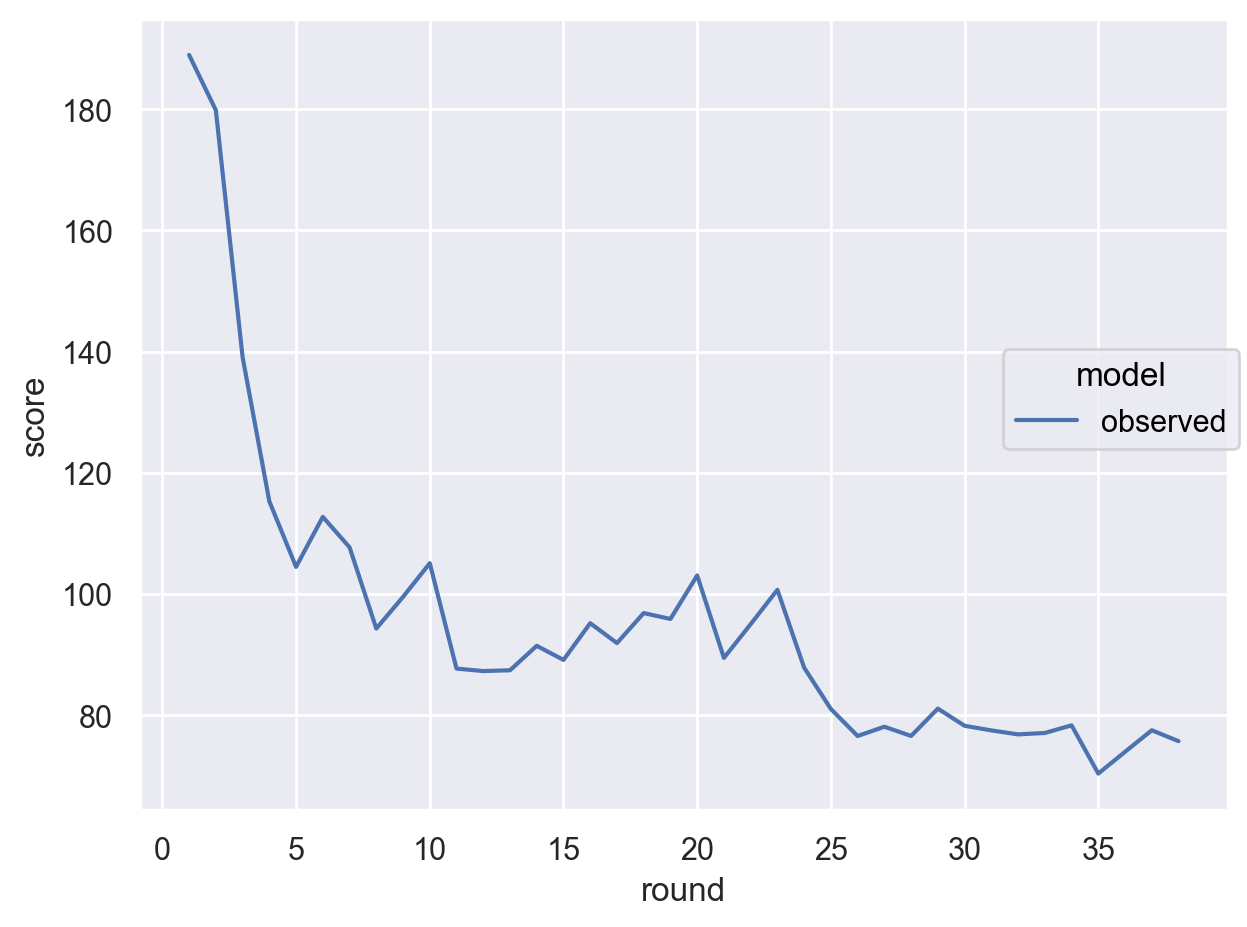

In [12]:
#| label: backtest-score
import seaborn.objects as so


def add(fig: so.Plot, teams: pl.DataFrame, model: str) -> pl.DataFrame:
    captains = (
        teams.filter(pl.col("position") != 6)
        .filter(pl.col("score") == pl.col("score").over("round").max())
        .with_columns(captain=1.5)
        .select("round", "id", "captain")
    )
    campaign = (
        teams.join(captains, on=["round", "id"], how="left")
        .with_columns(score=pl.col("score") * pl.col("captain").fill_null(1.0))
        .group_by("round")
        .agg(score=pl.col("score").sum())
        .with_columns(model=pl.lit(model))
    )
    fig = fig.add(so.Line(), data=campaign, x="round", y="score", color="model")
    return fig


fig = so.Plot()
fig = add(fig, teams, "observed")
fig.show()